### Classifying MNIST Dataset Digits with Convolutional Networks

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Loading Data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
#Reshaping and converting images to float
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Creating Model 

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0171 - acc: 0.9952
Epoch 2/5
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0138 - acc: 0.9958
Epoch 3/5
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0116 - acc: 0.9966
Epoch 4/5
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0092 - acc: 0.9973
Epoch 5/5
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0081 - acc: 0.9975


In [10]:
#The history dictionary contains all the information related to training the neural network:
history_dict = hist.history
print("History Dictionary Contents: ", history_dict.keys())

History Dictionary Contents:  dict_keys(['loss', 'acc'])


In [14]:
print("Training Set Loss at each iteration: ")
history_dict['acc']

Training Set Loss at each iteration: 


[0.9951666666666666, 0.9958, 0.9966, 0.9972666666666666, 0.9975]

In [15]:
#Plotting Training and Validation Metrics:
import matplotlib.pyplot as plt

acc_values = history_dict['acc']

In [16]:
epochs = range(1, len(acc_values) + 1)

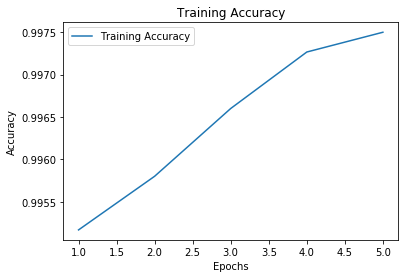

In [19]:
plt.plot(epochs, acc_values, label='Training Accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 5s 531us/step


In [12]:
test_acc

0.993